C:\Users\moinm\AppData\Local\Temp\ipykernel_19320\468569332.py:27: RuntimeWarning: divide by zero encountered in log10
  coord_cart_r = coord_cart * np.log10(vek_r)
C:\Users\moinm\AppData\Local\Temp\ipykernel_19320\468569332.py:27: RuntimeWarning: invalid value encountered in multiply
  coord_cart_r = coord_cart * np.log10(vek_r)


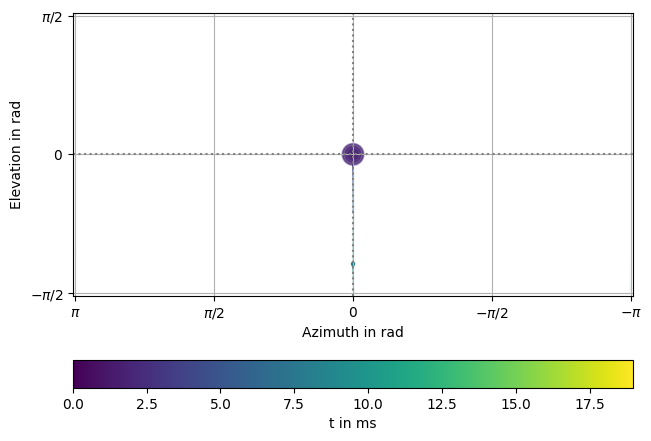

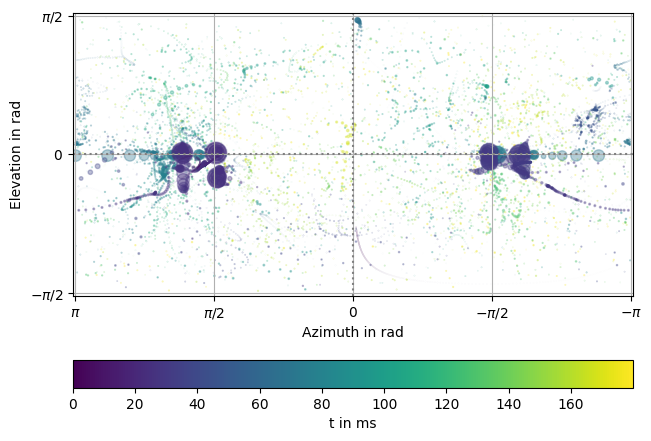

In [3]:
import spaudiopy as spa
import pyfar as pf
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import soundfile as sf
import glob

# load only Ambisonics B-Format components
n = 0
HOA_files_b = ["" for x in range(4)]

for i in [f'{i:>02}' for i in range(1, 5)]:
    HOA_files_b[n] = "HOA\HOA_A10p_S00_R00_CH" + i + ".wav"
    n = n+1

MultiSig = spa.io.load_audio(HOA_files_b)
ambi_b = spa.sig.AmbiBSignal.sh_to_b(MultiSig)

# Berechnung der Schalleinfallsrichtungen über Pseudointensität (IRIS)
vek_azi, vek_zen, vek_r = spa.parsa.pseudo_intensity(ambi_b, win_len=3, f_bp = (63,4000)) # win_len = 441 = 1 ms Mittelung
# vek_r = np.log10(np.abs(vek_r))

# Berechnung der Intensitätsvektoren
# coord_ps_i = spa.utils.sph2cart(vek_azi, vek_zen, vek_r)
coord_cart = spa.utils.dir2cart(vek_azi, vek_zen)
coord_cart_r = coord_cart * np.log10(vek_r)


## Plot der Intensitätsvektoren
# Definition des Evaluationszeitraumes
t_start = int(ambi_b.fs * 0.001)
t_ev = int(ambi_b.fs * 0.02)
t_ev2 = int(ambi_b.fs * 0.2)

# Extraktion der Vektorendpunkte (benötigt, für Zeitoptimierung)
x_pl = coord_cart_r[0]
y_pl = coord_cart_r[1]
z_pl = coord_cart_r[2]

# Plot der Vektoren
# ax = plt.axes(projection='3d')
# for i in range(t_ev, t_ev2):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]],'orange')

# for i in range(0, t_ev):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]],'red')

# ax.plot3D([0,10],[0,0],[0,0],'green')

# # ax.axes.set_xlim3d(left=-1, right=1)
# # ax.axes.set_ylim3d(bottom=-1, top=1)
# # ax.axes.set_zlim3d(bottom=-1, top=1)

# Plot der Schalleinfallsrichtungen in azi/zen/r/t
spa.plot.doa(vek_azi[t_start:t_ev], vek_zen[t_start:t_ev], vek_r[t_start:t_ev],  fs = ambi_b.fs)
spa.plot.doa(vek_azi[t_ev:t_ev2], vek_zen[t_ev:t_ev2],vek_r[t_ev:t_ev2], fs = ambi_b.fs)

# ambi_b_signal = ambi_b.get_signals()
# ambi_b_time = np.linspace(0,len(ambi_b_signal[0])/ambi_b.fs,len(ambi_b_signal[0]))
# fig, ax1 = plt.subplots()
# ax1.plot(ambi_b_time[0:t_ev2], 10*np.log10(ambi_b_signal[0, 0:t_ev2]**2))
# ax1.set_xlabel('t in s')
# ax1.set_ylabel('L in dB')
# bzw. über SDM
# ... viele Wege führen nach Rom und manchmal sogar zur CD_ROM